Ici, on procède à une régression linéaire avec effets fixes correspondant aux quartiers/arrondissements parisiens.

In [1]:
"""Librairies nécessaires"""
!pip install linearmodels ;
from linearmodels.panel import PanelOLS
import pandas as pd
from linearmodels.datasets import wage_panel
import statsmodels.api as sm
import pandas as pd
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.backends.backend_agg import FigureCanvasAgg
import os
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 838.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 11.8 MB/s eta 0:00:00


In [2]:
"""Changement de directory pour lire les fichiers"""
import os
os.getcwd() #trouver le directory actuel 
os.chdir('/home/onyxia/work/Projet-Stat-App-2A')

In [3]:
"""Chargement fichier dvf"""

path_folder = '3.2) Données finales/'
name_file = 'dvf_final_2021_to_2023.geojson'
path_file = path_folder + name_file

dvf = gpd.read_file(path_file)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [13]:
"""On définit une première structure de Panel avec les arrondissements"""

#mise en copie du fichier dvf
dvf_arr = dvf.copy()

#on supprime les lignes sans arrondissement
dvf_arr = dvf_arr[dvf_arr['num_arrondissement'] != 'n']

#on créée une colonne 'id'
dvf_arr['id'] = dvf_arr.index

#on ajoute la structure de panel
dvf_arr = dvf_arr.set_index(['num_arrondissement', 'id'])

#on ordonne par numéro d'arrondissement
dvf_arr = dvf_arr.sort_index(level='num_arrondissement')

#observation
dvf_arr.head(2)

id_mutation date_mutation       prix   log_prix  \
num_arrondissement id                                                     
01                 7   2021-1680107    2021-01-12   356644.0  12.784493   
                   12  2021-1680113    2021-01-13  1350000.0  14.115615   

                       nombre_pieces_principales  surface_reelle_bati  \
num_arrondissement id                                                   
01                 7                         1.0                 25.0   
                   12                        4.0                103.0   

                       surface_carrez  nombre_dependances  prix_au_m2_carrez  \
num_arrondissement id                                                          
01                 7            16.41                 0.0            21733.0   
                   12          104.80                 0.0            12882.0   

                       prix_au_m2_reel_bati  ...  dist_min_stat_ind_1  \
num_arrondissement id                        ...                        
01                 7                14266.0  ...                    0   
                   12               13107.0  ...                    1   

                      dist_min_stat_ind_2 dist_min_stat_ind_3  \
num_arrondissement id                                           
01                 7                    0                   0   
                   12                   0                   0   

                       dist_min_log_social_ind_1 dist_min_log_social_ind_2  \
num_arrondissement id                                                        
01                 7                           0                         0   
                   12                          0                         0   

                      dist_min_log_social_ind_3  dist_min_voie_eau_ind_1  \
num_arrondissement id                                                      
01                 7                          1                        0   
                   12                         1                        0   

                      dist_min_voie_eau_ind_2  dist_min_voie_eau_ind_3  \
num_arrondissement id                                                    
01                 7                        0                        1   
                   12                       1                        0   

                                       geometry  
num_arrondissement id                            
01                 7   POINT (2.34959 48.86323)  
                   12  POINT (2.34071 48.86229)  

[2 rows x 53 columns]

In [14]:
"""On définit une deuxième structure de Panel avec les quartiers"""

#mise en copie du fichier dvf
dvf_quartier = dvf.copy()

#on créée une colonne 'id'
dvf_quartier['id'] = dvf_quartier.index

#on ajoute la structure de panel
dvf_quartier = dvf_quartier.set_index(['nom_quartier', 'id'])

#on ordonne par quartier (alphabétique)
dvf_quartier = dvf_quartier.sort_index(level='nom_quartier')

#observation
dvf_quartier.head(2)

id_mutation date_mutation       prix   log_prix  \
nom_quartier id                                                      
Amérique     264  2021-1680658    2021-03-26  1051300.0  13.865538   
             270  2021-1680665    2021-03-30   241000.0  12.392552   

                  nombre_pieces_principales  surface_reelle_bati  \
nom_quartier id                                                    
Amérique     264                        4.0                 92.0   
             270                        1.0                 23.0   

                  surface_carrez  nombre_dependances  prix_au_m2_carrez  \
nom_quartier id                                                           
Amérique     264           91.32                 0.0            11512.0   
             270           23.06                 0.0            10451.0   

                  prix_au_m2_reel_bati  ...  dist_min_stat_ind_1  \
nom_quartier id                         ...                        
Amérique     264               11427.0  ...                    1   
             270               10478.0  ...                    0   

                 dist_min_stat_ind_2 dist_min_stat_ind_3  \
nom_quartier id                                            
Amérique     264                   0                   0   
             270                   0                   0   

                  dist_min_log_social_ind_1 dist_min_log_social_ind_2  \
nom_quartier id                                                         
Amérique     264                          0                         1   
             270                          1                         0   

                 dist_min_log_social_ind_3  dist_min_voie_eau_ind_1  \
nom_quartier id                                                       
Amérique     264                         0                        0   
             270                         0                        0   

                 dist_min_voie_eau_ind_2  dist_min_voie_eau_ind_3  \
nom_quartier id                                                     
Amérique     264                       0                        1   
             270                       0                        1   

                                  geometry  
nom_quartier id                             
Amérique     264  POINT (2.38889 48.88047)  
             270  POINT (2.38950 48.87921)  

[2 rows x 53 columns]

In [7]:
dvf_quartier.columns

Index(['id_mutation', 'date_mutation', 'prix', 'log_prix',
       'nombre_pieces_principales', 'surface_reelle_bati', 'surface_carrez',
       'nombre_dependances', 'prix_au_m2_carrez', 'prix_au_m2_reel_bati',
       'adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_arrondissement', 'num_arrondissement', 'dist_min_lycee',
       'nom_lycee', 'dist_min_grand_parc', 'dist_min_square', 'nom_grand_parc',
       'nom_square', 'dist_min_site_tour', 'nom_site_tour', 'dist_min_stat',
       'nom_stat', 'num_ligne', 'dist_min_log_social', 'dist_min_voie_eau',
       'longitude', 'latitude', 'dist_min_grand_parc_ind_1',
       'dist_min_grand_parc_ind_2', 'dist_min_grand_parc_ind_3',
       'dist_min_square_ind_1', 'dist_min_square_ind_2',
       'dist_min_square_ind_3', 'dist_min_site_tour_ind_1',
       'dist_min_site_tour_ind_2', 'dist_min_site_tour_ind_3',
       'dist_min_lycee_ind_1', 'dist_min_lycee_ind_2', 'dist_min_lycee_ind_3',
       'dist_min_stat_ind_1

In [8]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Plusieurs choix de variables explicatives

var_explicatives_avec_dist = ['nombre_pieces_principales', 'surface_reelle_bati', 'nombre_dependances',
                              'dist_min_grand_parc', 'dist_min_square', 'dist_min_site_tour', 'dist_min_stat', 'dist_min_lycee', 
                              'dist_min_log_social', 'dist_min_voie_eau']

var_explicatives_avec_dist_ind = ['nombre_pieces_principales', 'surface_reelle_bati', 'nombre_dependances',
                               'dist_min_grand_parc_ind_1', 'dist_min_grand_parc_ind_2',
                               'dist_min_grand_parc_ind_3', 'dist_min_square_ind_1',
                               'dist_min_square_ind_2', 'dist_min_square_ind_3',
                               'dist_min_site_tour_ind_1', 'dist_min_site_tour_ind_2',
                               'dist_min_site_tour_ind_3', 'dist_min_lycee_ind_1',
                               'dist_min_lycee_ind_2', 'dist_min_lycee_ind_3', 'dist_min_stat_ind_1',
                               'dist_min_stat_ind_2', 'dist_min_stat_ind_3',
                               'dist_min_log_social_ind_1', 'dist_min_log_social_ind_2',
                               'dist_min_log_social_ind_3', 'dist_min_voie_eau_ind_1',
                               'dist_min_voie_eau_ind_2', 'dist_min_voie_eau_ind_3']

In [30]:
"""Fonction qui fait la régression avec effets fixes dans le cas des données de panel selon l'ARRONDISSEMENT"""

def reg_fixed_effects_arr(dvf, var_a_expliquer, var_explicatives, outer_path, panel='arr', ind='ind'):
    
    # Séparer la variable dépendante et les variables indépendantes
    y = dvf[var_a_expliquer]
    X = dvf[var_explicatives]

    # Créer un DataFrame avec les variables dépendantes et indépendantes
    df = pd.concat([y, X], axis=1)

    # Spécifier la formule du modèle avec les effets fixes pour les arrondissements
    formula = f'{var_a_expliquer} ~ 1 + {" + ".join(var_explicatives)} + EntityEffects'

    # Estimation du modèle PanelOLS avec effets fixes pour les arrondissements
    model = PanelOLS.from_formula(formula, df)
    results = model.fit(cov_type='clustered', cluster_entity=True)

    # Récupérer les effets fixes
    effets_fixes = results.estimated_effects
    effets_fixes = effets_fixes.groupby('num_arrondissement')['estimated_effects'].mean().reset_index()
    effets_fixes = effets_fixes.rename(columns={'estimated_effects': 'effets_fixes'})
    effets_fixes['effets_fixes'] = effets_fixes['effets_fixes'].round(3)
    effets_fixes = effets_fixes.sort_values(by='effets_fixes', ascending=False)

    # Sauvegarder les effets fixes au format CSV
    effets_fixes.to_csv(outer_path + f'effets_fixes_{panel}_{ind}.csv', index=False)

    # Créer une figure textuelle avec le résumé de la régression
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Masquer les axes
    ax.text(0, 0.95, str(results.summary), va='top', ha='left', fontsize=10, family='monospace')

    # Sauvegarder la figure de résumé en format JPEG avec spécification de la résolution (dpi)
    summary_image_path = os.path.join(outer_path, f'regression_summary_{panel}_{ind}.jpg')
    fig.savefig(summary_image_path, format='jpeg', dpi=300)
    print(f"Résumé de régression exporté avec succès dans : {summary_image_path}")

Résumé de régression exporté avec succès dans : 4) Modélisation/3) Regression_hedonique/Sorties/regression_summary_arr_.jpg


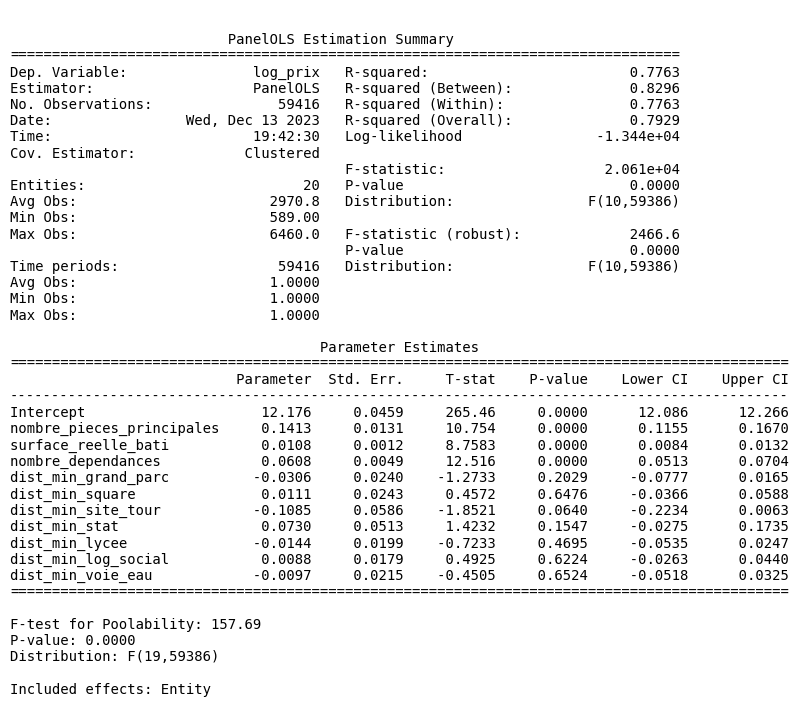

In [31]:
"""On applique la fonction"""

var_a_expliquer = 'log_prix'
outer_path = '4) Modélisation/3) Regression_hedonique/Sorties/'

reg_fixed_effects_arr(dvf_arr, var_a_expliquer, var_explicatives_avec_dist, outer_path, ind='')

In [33]:
def reg_fixed_effects_arr(dvf, var_a_expliquer, var_explicatives, outer_path, panel='arr', ind='ind'):
    
    # Séparer la variable dépendante et les variables indépendantes
    y = dvf[var_a_expliquer]
    X = dvf[var_explicatives]

    # Créer un DataFrame avec les variables dépendantes et indépendantes
    df = pd.concat([y, X], axis=1)

    # Spécifier la formule du modèle avec les effets fixes pour les arrondissements
    formula = f'{var_a_expliquer} ~ 1 + {" + ".join(var_explicatives)} + EntityEffects'

    # Estimation du modèle PanelOLS avec effets fixes pour les arrondissements
    model = PanelOLS.from_formula(formula, df)
    results = model.fit(cov_type='clustered', cluster_entity=True)

    # Récupérer les effets fixes
    effets_fixes = results.estimated_effects
    effets_fixes = effets_fixes.groupby('num_arrondissement')['estimated_effects'].mean().reset_index()
    effets_fixes = effets_fixes.rename(columns={'estimated_effects': 'effets_fixes'})
    effets_fixes['effets_fixes'] = effets_fixes['effets_fixes'].round(3)
    effets_fixes = effets_fixes.sort_values(by='effets_fixes', ascending=False)

    # Sauvegarder les effets fixes au format CSV
    effets_fixes.to_csv(outer_path + f'effets_fixes_{panel}_{ind}.csv', index=False)

    # Créer une figure textuelle avec le résumé de la régression
    fig, ax = plt.subplots(figsize=(15, 10))  # Ajustez la taille de la figure selon vos besoins
    ax.axis('off')  # Masquer les axes
    ax.text(0, 0.95, str(results.summary), va='top', ha='left', fontsize=8, family='monospace')  # Ajustez la taille de la police

    # Sauvegarder la figure de résumé en format JPEG avec spécification de la résolution (dpi)
    summary_image_path = os.path.join(outer_path, f'regression_summary_{panel}_{ind}.jpg')
    fig.savefig(summary_image_path, format='jpeg', dpi=300, bbox_inches='tight')
    print(f"Résumé de régression exporté avec succès dans : {summary_image_path}")


Résumé de régression exporté avec succès dans : 4) Modélisation/3) Regression_hedonique/Sorties/regression_summary_arr_ind.jpg


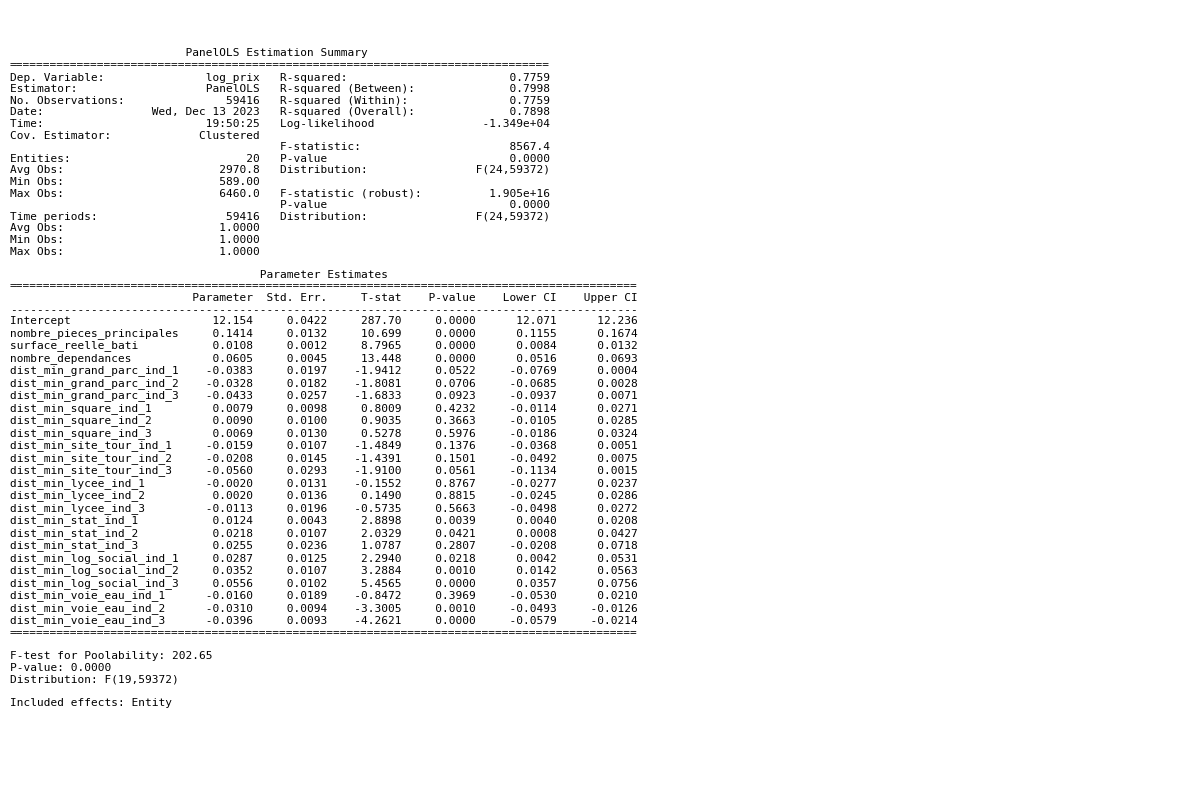

In [34]:
"""On applique la fonction avec les indicatrices"""

var_a_expliquer = 'log_prix'
outer_path = '4) Modélisation/3) Regression_hedonique/Sorties/'

reg_fixed_effects_arr(dvf_arr, var_a_expliquer, var_explicatives_avec_dist_ind, outer_path)

In [207]:
"""Fonction qui fait la régression avec effets fixes dans le cas des données de panel selon le QUARTIER"""

def reg_fixed_effects_quartier(dvf, var_a_expliquer, var_explicatives, outer_path, panel='quar', ind='ind'):
    
    # Séparer la variable dépendante et les variables indépendantes
    y = dvf[var_a_expliquer]
    X = dvf[var_explicatives]

    # Créer un DataFrame avec les variables dépendantes et indépendantes
    df = pd.concat([y, X], axis=1)

    # Spécifier la formule du modèle avec les effets fixes pour les arrondissements
    formula = f'{var_a_expliquer} ~ 1 + {" + ".join(var_explicatives)} + EntityEffects'

    # Estimation du modèle PanelOLS avec effets fixes pour les arrondissements
    model = PanelOLS.from_formula(formula, df)
    results = model.fit(cov_type='clustered', cluster_entity=True)

    # Récupérer les effets fixes
    effets_fixes = results.estimated_effects
    effets_fixes = effets_fixes.groupby('nom_quartier')['estimated_effects'].mean().reset_index()
    effets_fixes = effets_fixes.rename(columns={'estimated_effects': 'effets_fixes'})
    effets_fixes = effets_fixes.sort_values(by='effets_fixes', ascending=False)

    # Sauvegarder les effets fixes au format CSV
    effets_fixes.to_csv(outer_path + f'effets_fixes_{panel}_{ind}.csv', index=False)

    # Créer une figure textuelle avec le résumé de la régression
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Masquer les axes
    ax.text(0, 0.95, str(results.summary), va='top', ha='left', fontsize=10, family='monospace')

    # Sauvegarder la figure de résumé en format JPEG avec spécification de la résolution (dpi)
    summary_image_path = os.path.join(outer_path, f'regression_summary_{panel}_{ind}.jpg')
    fig.savefig(summary_image_path, format='jpeg', dpi=300)
    print(f"Résumé de régression exporté avec succès dans : {summary_image_path}")

Résumé de régression exporté avec succès dans : 4) Modélisation/3) Regression_hedonique/Sorties/regression_summary_quar_ind.jpg
Résumé de régression exporté avec succès dans : 4) Modélisation/3) Regression_hedonique/Sorties/regression_summary_quar_.jpg


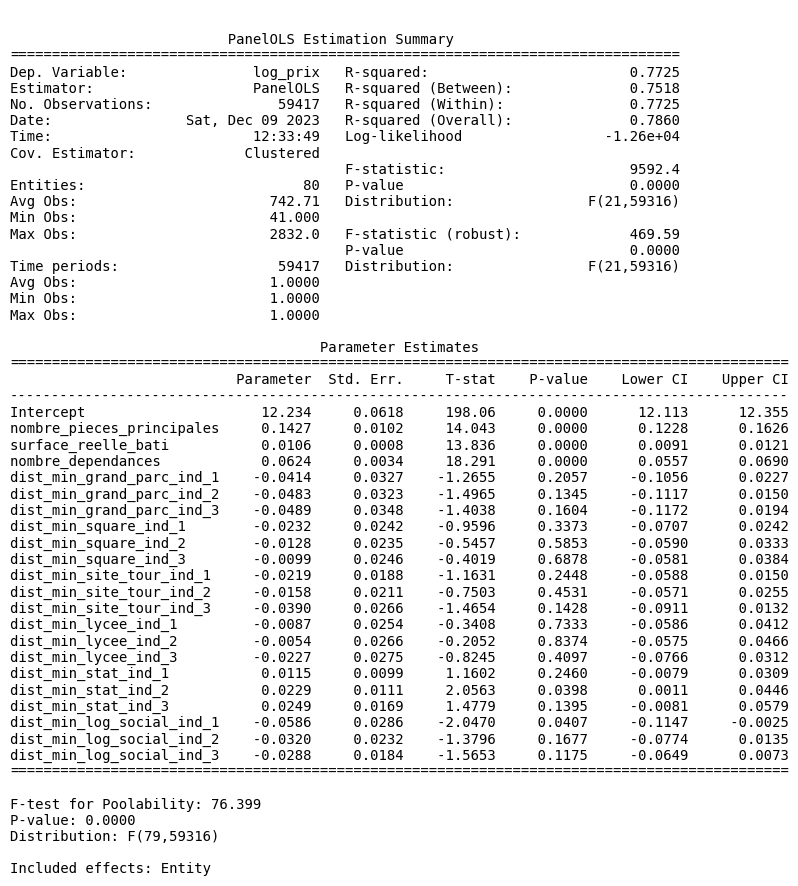

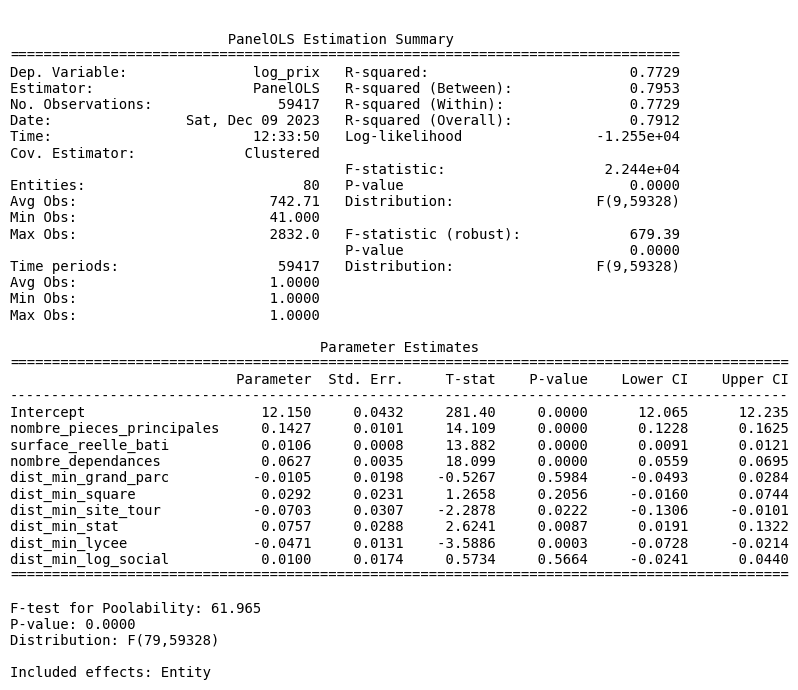

In [213]:
"""On applique la fonction avec indicatrices et sans indicatrices pour les distances"""

var_a_expliquer = 'log_prix'
outer_path = '4) Modélisation/3) Regression_hedonique/Sorties/'

reg_fixed_effects_quartier(dvf_quartier, var_a_expliquer, var_explicatives_avec_dist_ind, outer_path, panel='quar', ind='ind')

reg_fixed_effects_quartier(dvf_quartier, var_a_expliquer, var_explicatives_avec_dist, outer_path, panel='quar', ind='')